In [1]:
# import
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import altair as alt
import warnings
import streamlit as st
from keras.layers import Dense, Activation
from keras.models import Sequential
from tensorflow import keras
from sklearn.cluster import KMeans


# NLP
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import string

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file
%matplotlib inline

# this line makes plots prettier on mac retina screens - if you don't have one it shouldn't do anything
%config InlineBackend.figure_format = 'retina'


# Style
sns.set_style(style = 'darkgrid')

In [2]:
df = pd.read_csv("global/glassdoor_webscraped.csv")
df2 = pd.read_csv('japan/review_jp_nlp.csv')

In [3]:
df2.rename(columns = {'reviwe_translated_original': 'review_translated_original'}, inplace = True)

In [4]:
df = df.loc[:, 'rating':'cons']
df2 = df2.loc[:, 'rating':'emotion']

In [5]:
neg = df2[df2['sentiment'] == 'neg']
pos = df2[df2['sentiment'] == 'pos']

In [6]:
neg = neg[['rating', 'review_translated_original']]
pos = pos[['rating', 'review_translated_original']]

In [7]:
pos1 = df.loc[:, 'rating':'pros']
neg1 = df[['rating', 'cons']]

In [8]:
pos.columns = pos1.columns
neg.columns = neg1.columns

In [9]:
df_p = pos.append(pos1, ignore_index = True)
df_n = neg.append(neg1, ignore_index = True)

In [ ]:
df_p.dropna(inplace = True)
df_n.dropna(inplace = True)

In [ ]:
# NLP
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import string

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from textblob import TextBlob
from textblob import Word
import re,string,unicodedata

In [ ]:
df_p['pros'] = df_p['pros'].str.lower()
df_n['cons'] = df_n['cons'].str.lower()

In [ ]:
#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

In [ ]:
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',str(text))
    return text
#Apply function on review column
df_p['pros']=df_p['pros'].apply(remove_special_characters)
df_n['cons']=df_n['cons'].apply(remove_special_characters)

In [ ]:
lemmatizer = nltk.stem.WordNetLemmatizer()
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]


#Apply function on review column
df_p['pros']=df_p['pros'].apply(lemmatize_text)
df_n['cons']=df_n['cons'].apply(lemmatize_text)

In [ ]:
#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

#Apply function on review column
df_p['pros']=df_p['pros'].apply(remove_stopwords)
df_n['cons']=df_n['cons'].apply(remove_stopwords)

### TF-IDF vect (Term Frequency Inverse Document Frequency)

tf-idf consider overall documents of weight of words.



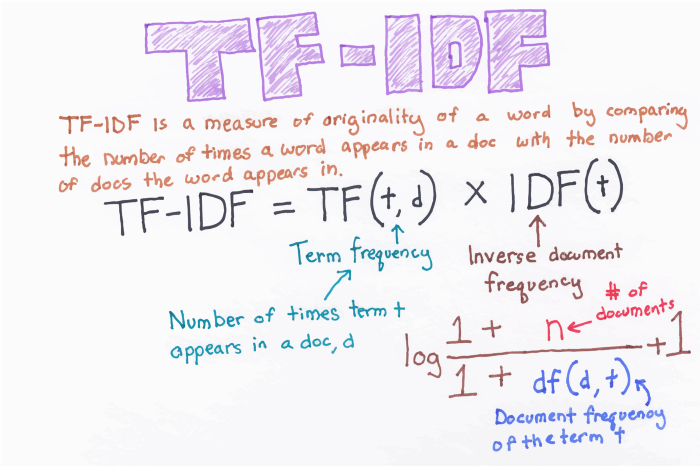

In [ ]:
df_p.pros

### Monogram

In [ ]:
tf = TfidfVectorizer(stop_words='english', min_df=3)
tf.fit(df_p['pros'])

pro_tf = tf.transform(df_p['pros'])
pro_df = pd.DataFrame(pro_tf.todense(), columns=tf.get_feature_names())



fig, ax = plt.subplots(figsize = (15,15))
top_texts = pro_df.sum().sort_values(ascending=False)
top_texts.head(50).plot(kind='barh')
print(fig)

In [ ]:
tf = TfidfVectorizer(stop_words='english', min_df=3)
tf.fit(df_n['cons'])

pro_tf = tf.transform(df_n['cons'])
pro_df = pd.DataFrame(pro_tf.todense(), columns=tf.get_feature_names())



fig, ax = plt.subplots(figsize = (15,15))
top_texts = pro_df.sum().sort_values(ascending=False)
top_texts.head(50).plot(kind='barh')
print(fig)

### Bigram

In [ ]:
tf = TfidfVectorizer(stop_words='english', min_df=3, ngram_range = (2,3))
tf.fit(df_p['pros'])

pro_tf = tf.transform(df_p['pros'])
pro_df = pd.DataFrame(pro_tf.todense(), columns=tf.get_feature_names())



fig, ax = plt.subplots(figsize = (15,15))
top_texts = pro_df.sum().sort_values(ascending=False)
top_texts.head(80).plot(kind='barh')
print(fig)

In [ ]:
tf = TfidfVectorizer(stop_words='english', min_df=3, ngram_range = (2,3))
tf.fit(df_n['cons'])

pro_tf = tf.transform(df_n['cons'])
pro_df = pd.DataFrame(pro_tf.todense(), columns=tf.get_feature_names())



fig, ax = plt.subplots(figsize = (15,15))
top_texts = pro_df.sum().sort_values(ascending=False)
top_texts.head(80).plot(kind='barh')
print(fig)

In [ ]:
df_p